<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix, roc_curve, f1_score,accuracy_score, recall_score, precision_score, classification_report

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
ds = pd.read_csv("Churn.csv")

## Data Overview

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
ds.shape

(10000, 14)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
ds.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # For boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show() 

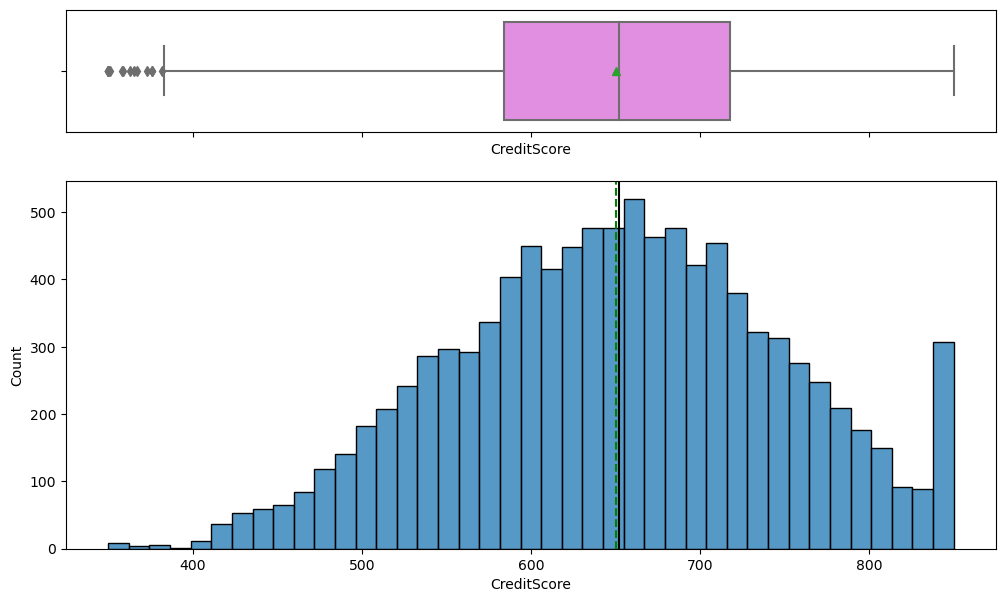

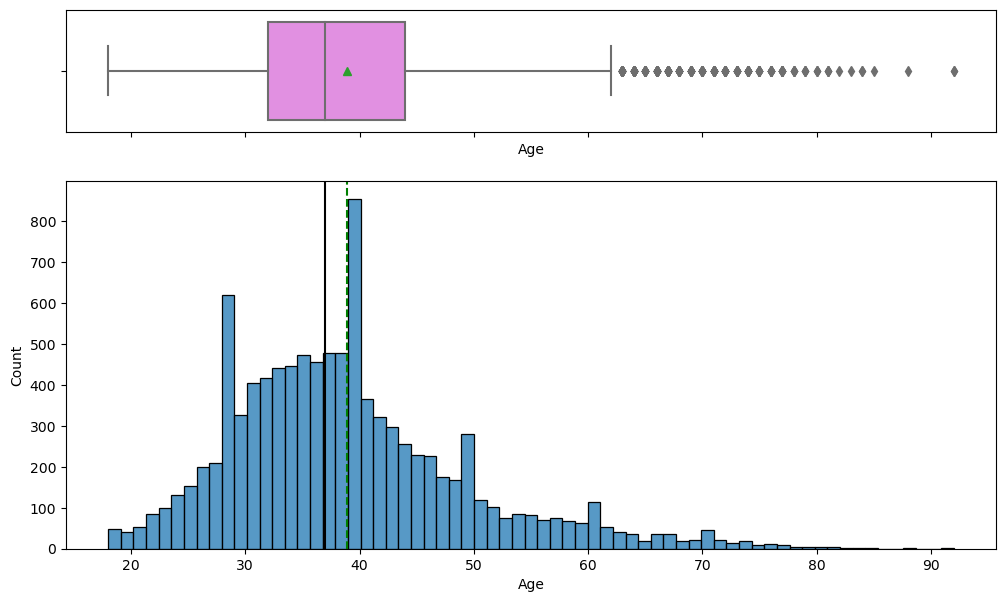

In [13]:
features_for_HistBoxplot_1 = ['CreditScore', 
                            'Age'
                         ]

for i in features_for_HistBoxplot_1:
    histogram_boxplot(ds, i)

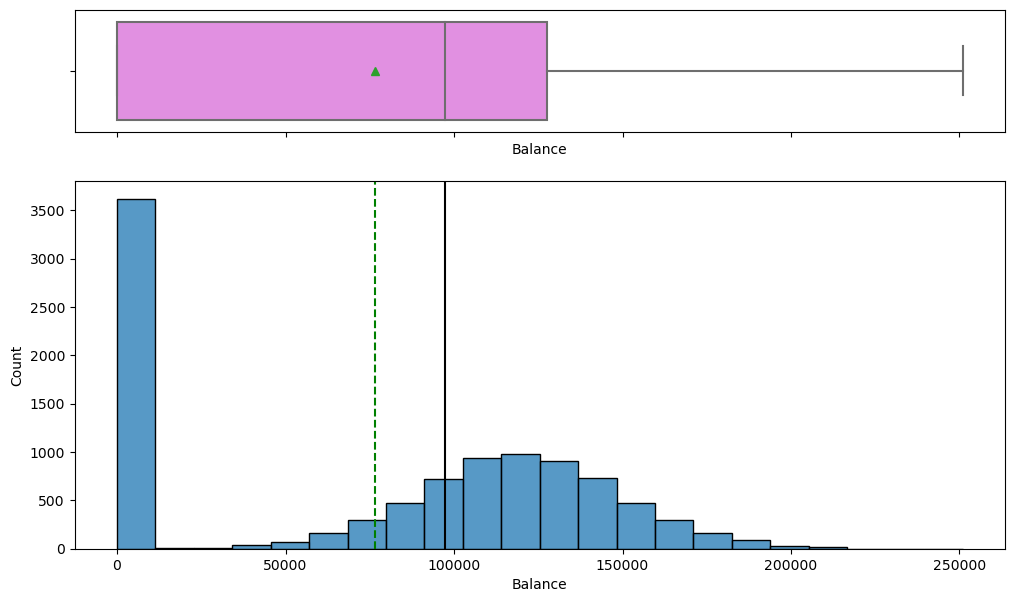

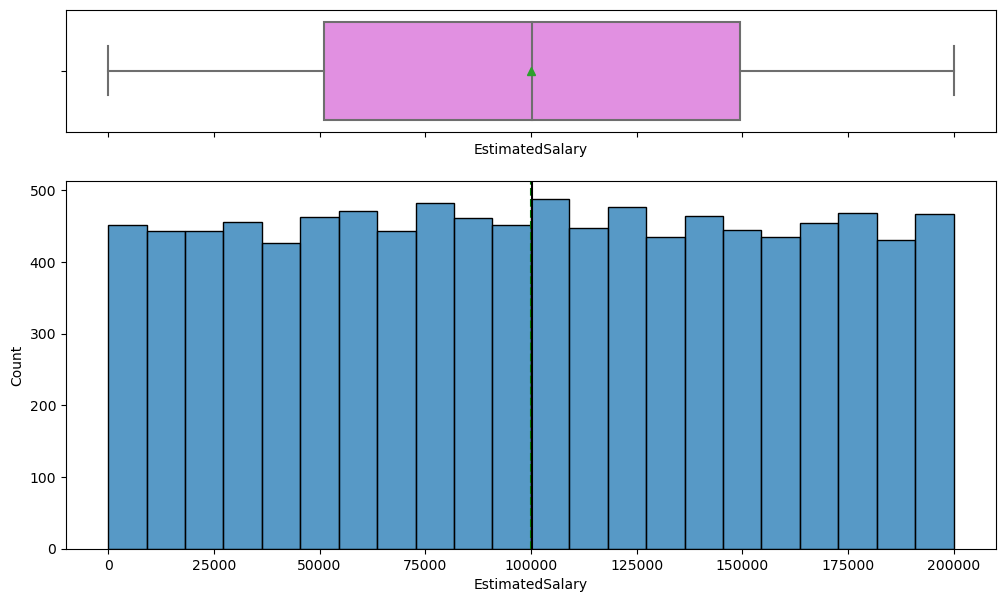

In [14]:
features_for_HistBoxplot_2 = ['Balance',
                              'EstimatedSalary'
                         ]

for i in features_for_HistBoxplot_2:
    histogram_boxplot(ds, i)

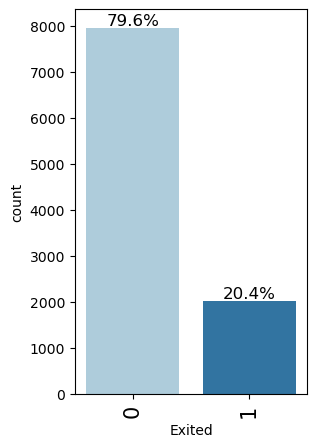

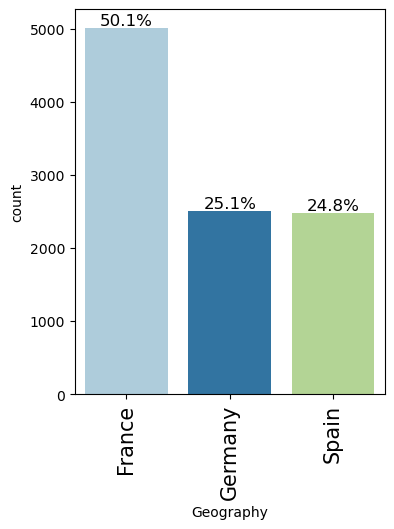

In [15]:
features_for_LabeledBarplot_1 = ['Exited', 
                            'Geography'
                         ]

for i in features_for_LabeledBarplot_1:
    labeled_barplot(ds, i, perc=True)

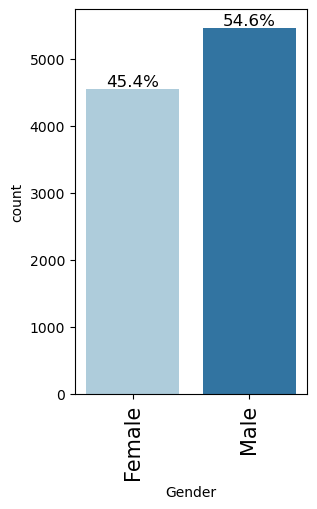

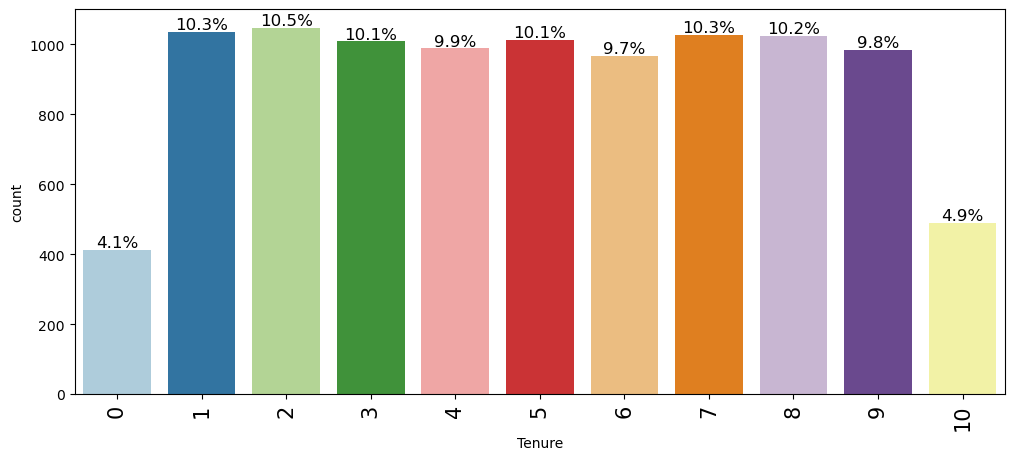

In [16]:
features_for_LabeledBarplot_2 = ['Gender', 
                            'Tenure'
                         ]

for i in features_for_LabeledBarplot_2:
    labeled_barplot(ds, i, perc=True)

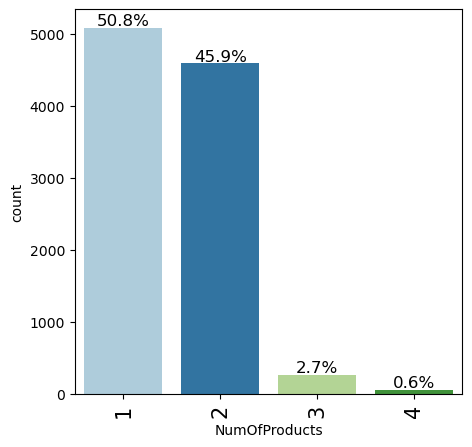

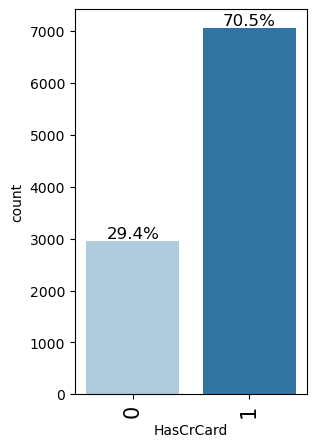

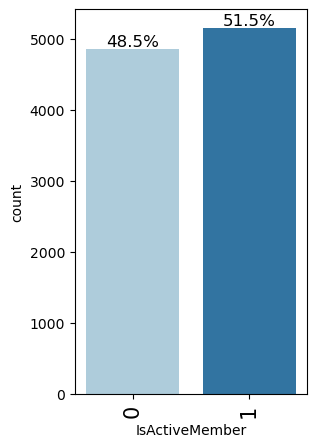

In [17]:
features_for_LabeledBarplot_3 = ['NumOfProducts', 
                                 'HasCrCard',
                                 'IsActiveMember'
                         ]

for i in features_for_LabeledBarplot_3:
    labeled_barplot(ds, i, perc=True)

### Bivariate Analysis

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


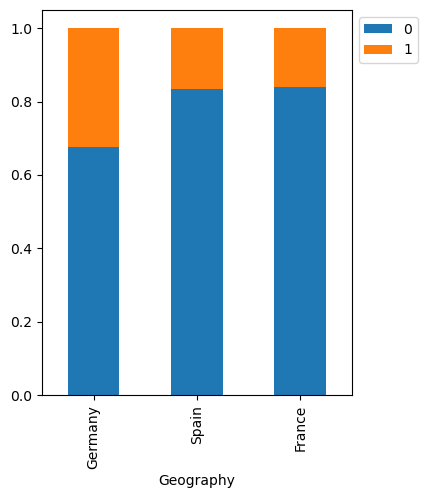

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


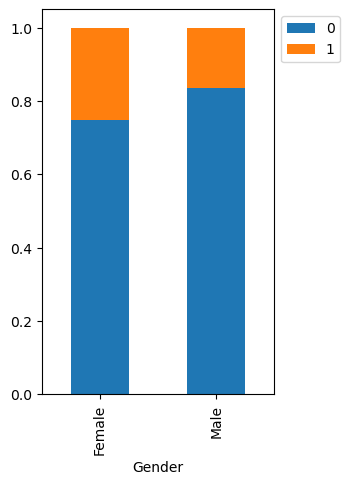

In [20]:
features_for_StackedBarplot_1 = ['Geography', 
                                 'Gender',
                         ]

for i in features_for_StackedBarplot_1:
    stacked_barplot(ds, i, "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


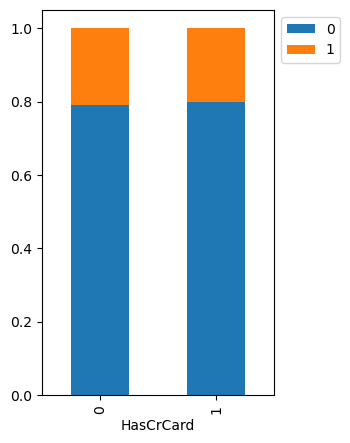

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


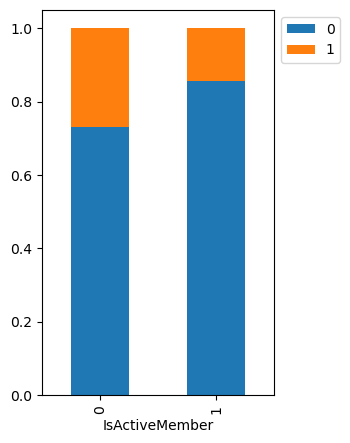

In [21]:
features_for_StackedBarplot_2 = ['HasCrCard',
                                 'IsActiveMember'
                         ]

for i in features_for_StackedBarplot_2:
    stacked_barplot(ds, i, "Exited")

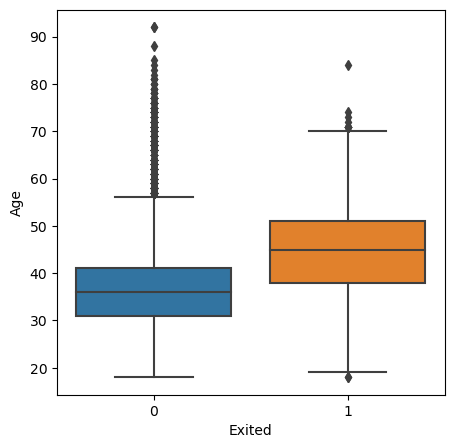

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

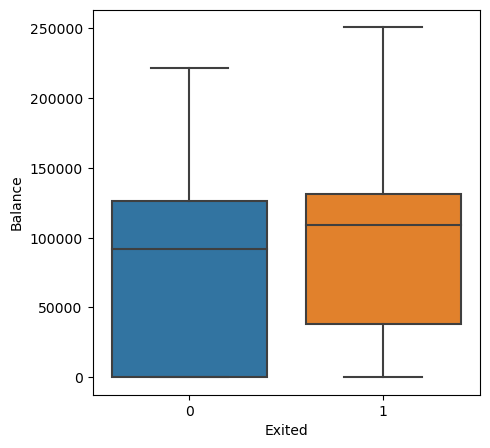

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

##### Correlation

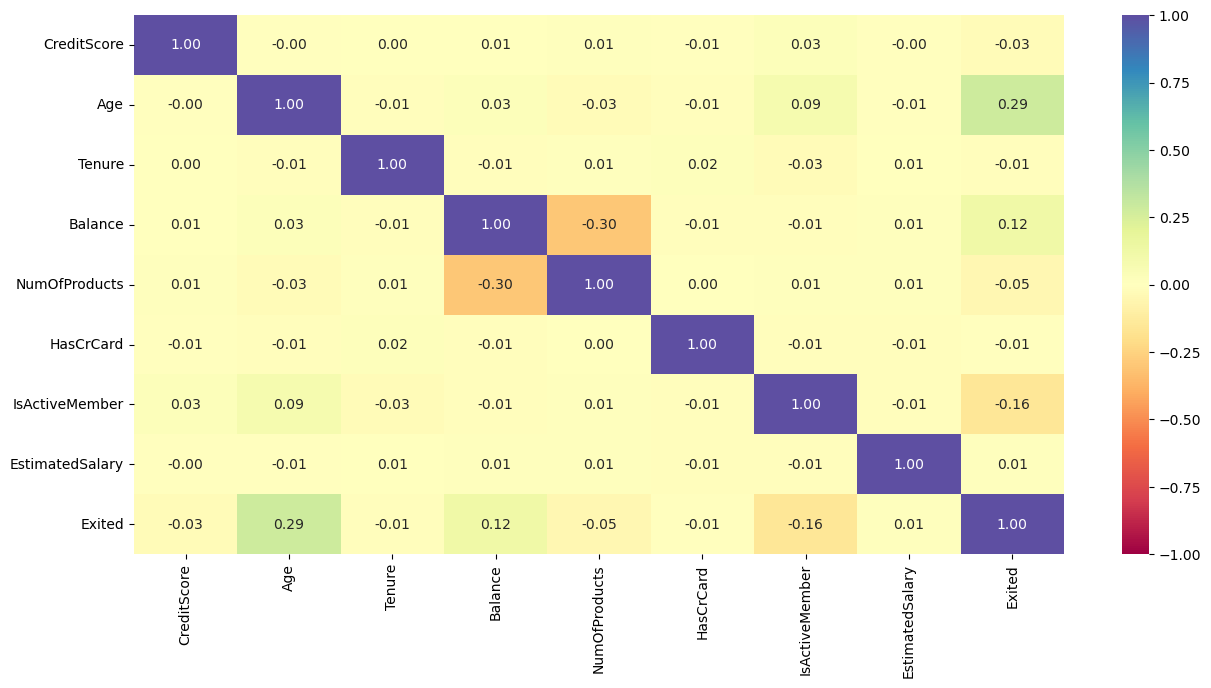

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [24]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [25]:
X = ds.drop(['Exited'],axis=1) 
y = ds['Exited'] 

In [26]:
# Splitting the dataset into the Training and Testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) 

In [27]:
# Splitting the dataset into the Training and Testing set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42,stratify=y_train, shuffle = True) 

In [28]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [29]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


In [30]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

### Data Normalization

In [31]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)    
X_test = sc.transform(X_test)   

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- The cost of missing a churned customer is typically higher than the cost of wrongly targeting a customer who would not churn (a false positive). With recall, the bank ensures it captures the majority of customers who are at risk of leaving. Recall emphasizes reducing false negatives, which in this case corresponds to customers predicted as “not churning” when they actually do churn. Missing these customers could lead to missed opportunities for intervention and retention.

In [32]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() 
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) 
    plt.ylabel(name.capitalize()) 
    plt.xlabel('Epoch') 
    fig.legend(['Train', 'Validation'], loc="outside right upper") 

In [33]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [34]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [35]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [36]:
#Initializing the neural network
model_0 = Sequential()

model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid'))

In [37]:
optimizer = tf.keras.optimizers.legacy.SGD(0.001)

metric = keras.metrics.Recall()

In [38]:
#compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [39]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fitting the ANN
batch_size=64
epochs=100

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,    
    validation_data=(X_val,y_val),
    epochs=epochs,   
    verbose=1
)

Epoch 1/100
100/100 [==============================] - 0s 865us/step - loss: 0.6755 - recall: 0.3451 - val_loss: 0.6505 - val_recall: 0.2025
Epoch 2/100
  1/100 [..............................] - ETA: 0s - loss: 0.6355 - recall: 0.3333

2024-11-23 08:34:21.800735: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - 0s 352us/step - loss: 0.6339 - recall: 0.1794 - val_loss: 0.6160 - val_recall: 0.0951
Epoch 3/100
100/100 [==============================] - 0s 358us/step - loss: 0.6024 - recall: 0.0821 - val_loss: 0.5898 - val_recall: 0.0429
Epoch 4/100
100/100 [==============================] - 0s 339us/step - loss: 0.5782 - recall: 0.0245 - val_loss: 0.5695 - val_recall: 0.0092
Epoch 5/100
100/100 [==============================] - 0s 336us/step - loss: 0.5595 - recall: 0.0069 - val_loss: 0.5537 - val_recall: 0.0031
Epoch 6/100
100/100 [==============================] - 0s 339us/step - loss: 0.5448 - recall: 7.6687e-04 - val_loss: 0.5414 - val_recall: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 331us/step - loss: 0.5333 - recall: 0.0000e+00 - val_loss: 0.5316 - val_recall: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 336us/step - loss: 0.5240 - recall: 0.0000e+00 - val_loss: 0.5237 - val_recall: 0.0000e+00
E

100/100 [==============================] - 0s 321us/step - loss: 0.4367 - recall: 0.0943 - val_loss: 0.4463 - val_recall: 0.0767
Epoch 59/100
100/100 [==============================] - 0s 322us/step - loss: 0.4361 - recall: 0.1020 - val_loss: 0.4457 - val_recall: 0.0828
Epoch 60/100
100/100 [==============================] - 0s 320us/step - loss: 0.4355 - recall: 0.1058 - val_loss: 0.4452 - val_recall: 0.0890
Epoch 61/100
100/100 [==============================] - 0s 325us/step - loss: 0.4350 - recall: 0.1074 - val_loss: 0.4447 - val_recall: 0.0890
Epoch 62/100
100/100 [==============================] - 0s 325us/step - loss: 0.4344 - recall: 0.1081 - val_loss: 0.4442 - val_recall: 0.0920
Epoch 63/100
100/100 [==============================] - 0s 323us/step - loss: 0.4339 - recall: 0.1120 - val_loss: 0.4437 - val_recall: 0.0951
Epoch 64/100
100/100 [==============================] - 0s 333us/step - loss: 0.4334 - recall: 0.1150 - val_loss: 0.4433 - val_recall: 0.0951
Epoch 65/100
100/10

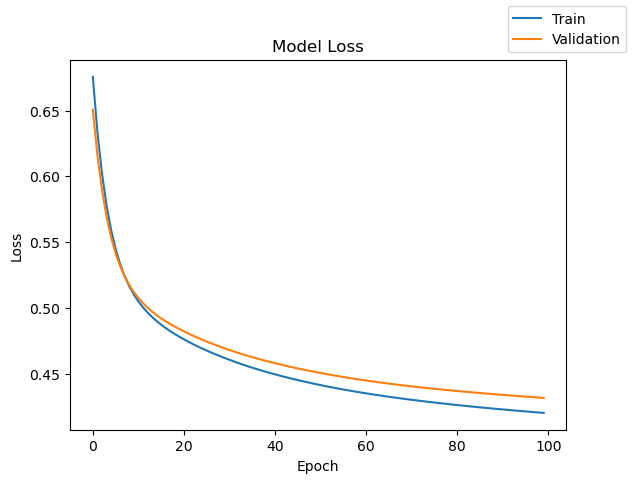

In [41]:
plot(history_0,'loss')

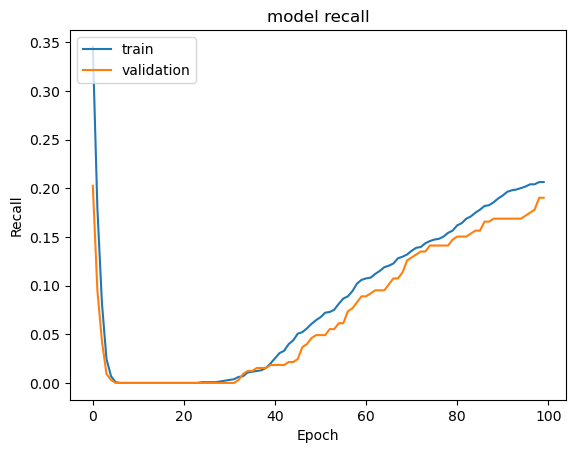

In [42]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

200/200 [==============================] - 0s 227us/step


In [44]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 232us/step


In [45]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [46]:
train_metric_df

,recall
NN with SGD,0.207055


In [47]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      5096
         1.0       0.68      0.21      0.32      1304

    accuracy                           0.82      6400
   macro avg       0.75      0.59      0.61      6400
weighted avg       0.80      0.82      0.78      6400



In [48]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1274
         1.0       0.67      0.19      0.30       326

    accuracy                           0.82      1600
   macro avg       0.75      0.58      0.59      1600
weighted avg       0.79      0.82      0.77      1600



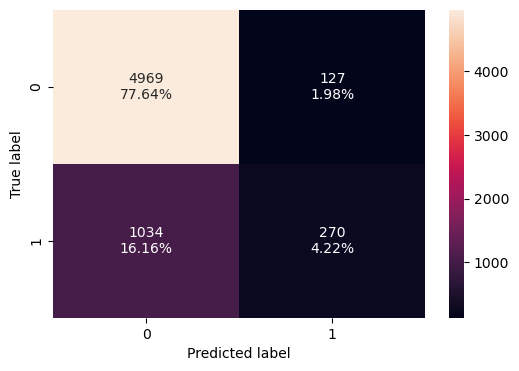

In [49]:
make_confusion_matrix(y_train, y_train_pred)

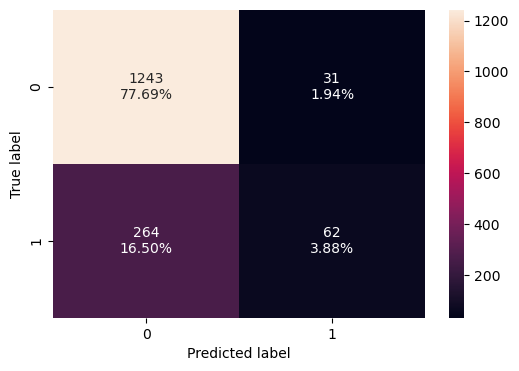

In [50]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [51]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [52]:
#Initializing the neural network
model_1 = Sequential()

model_1.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_1.add(Dense(16,activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [53]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.legacy.Adam()

In [54]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [55]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [56]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=batch_size, 
    validation_data=(X_val,y_val),
    epochs=epochs, 
    verbose=1
)

Epoch 1/100
100/100 [==============================] - 0s 931us/step - loss: 0.5194 - recall: 0.0656 - val_loss: 0.4689 - val_recall: 0.0031
Epoch 2/100
100/100 [==============================] - 0s 460us/step - loss: 0.4386 - recall: 0.0706 - val_loss: 0.4445 - val_recall: 0.0890
Epoch 3/100
100/100 [==============================] - 0s 482us/step - loss: 0.4188 - recall: 0.2002 - val_loss: 0.4269 - val_recall: 0.2055
Epoch 4/100
100/100 [==============================] - 0s 450us/step - loss: 0.4029 - recall: 0.2914 - val_loss: 0.4101 - val_recall: 0.3006
Epoch 5/100
100/100 [==============================] - 0s 467us/step - loss: 0.3871 - recall: 0.3505 - val_loss: 0.3930 - val_recall: 0.3006
Epoch 6/100
100/100 [==============================] - 0s 488us/step - loss: 0.3712 - recall: 0.3804 - val_loss: 0.3789 - val_recall: 0.3742
Epoch 7/100
100/100 [==============================] - 0s 474us/step - loss: 0.3588 - recall: 0.4218 - val_loss: 0.3673 - val_recall: 0.3957
Epoch 8/100
1

Epoch 59/100
100/100 [==============================] - 0s 449us/step - loss: 0.3059 - recall: 0.5008 - val_loss: 0.3560 - val_recall: 0.4693
Epoch 60/100
100/100 [==============================] - 0s 457us/step - loss: 0.3048 - recall: 0.5169 - val_loss: 0.3628 - val_recall: 0.4018
Epoch 61/100
100/100 [==============================] - 0s 441us/step - loss: 0.3053 - recall: 0.5038 - val_loss: 0.3559 - val_recall: 0.5000
Epoch 62/100
100/100 [==============================] - 0s 446us/step - loss: 0.3041 - recall: 0.5107 - val_loss: 0.3550 - val_recall: 0.4939
Epoch 63/100
100/100 [==============================] - 0s 451us/step - loss: 0.3033 - recall: 0.5176 - val_loss: 0.3554 - val_recall: 0.4571
Epoch 64/100
100/100 [==============================] - 0s 447us/step - loss: 0.3030 - recall: 0.5230 - val_loss: 0.3562 - val_recall: 0.4693
Epoch 65/100
100/100 [==============================] - 0s 434us/step - loss: 0.3024 - recall: 0.5176 - val_loss: 0.3586 - val_recall: 0.4448
Epoch 

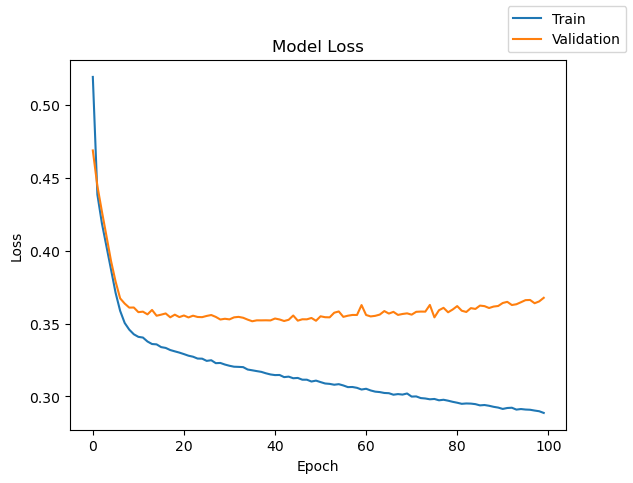

In [57]:
#Plotting Train Loss vs Validation Loss
plot(history_1,'loss')

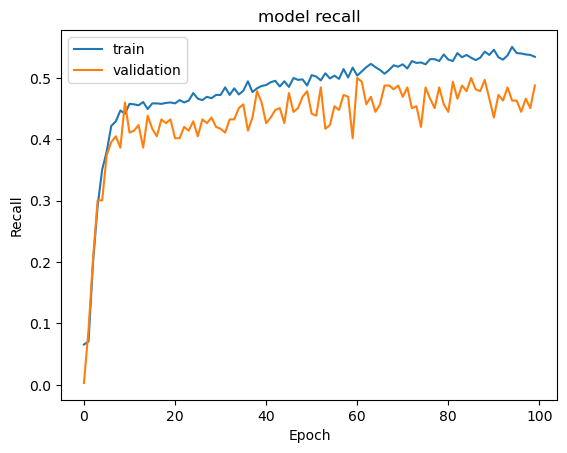

In [58]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

200/200 [==============================] - 0s 224us/step


In [60]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 232us/step


In [61]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [62]:
train_metric_df

,recall
NN with SGD,0.207055
NN with Adam,0.577454


In [63]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      5096
         1.0       0.76      0.58      0.66      1304

    accuracy                           0.88      6400
   macro avg       0.83      0.77      0.79      6400
weighted avg       0.87      0.88      0.87      6400



In [64]:
#classification report
cr=classification_report(y_val,y_val_pred)  
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1274
         1.0       0.69      0.49      0.57       326

    accuracy                           0.85      1600
   macro avg       0.78      0.72      0.74      1600
weighted avg       0.84      0.85      0.84      1600



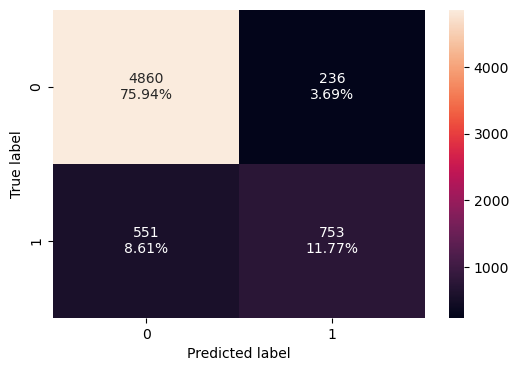

In [65]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

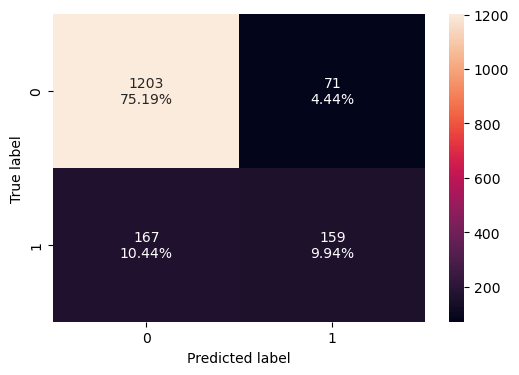

In [66]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [67]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [68]:
#Initializing the neural network
model_2 = Sequential()

model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Dense(24,activation='relu'))
model_2.add(Dense(16,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [69]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.legacy.Adam()

In [70]:
#compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [71]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [72]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  
    epochs=epochs, 
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 [==============================] - 0s 679us/step - loss: 0.5390 - recall: 0.1497 - val_loss: 0.4536 - val_recall: 0.0031
Epoch 2/100
200/200 [==============================] - 0s 470us/step - loss: 0.4415 - recall: 0.1235 - val_loss: 0.4184 - val_recall: 0.1902
Epoch 3/100
200/200 [==============================] - 0s 462us/step - loss: 0.4117 - recall: 0.2906 - val_loss: 0.3872 - val_recall: 0.3129
Epoch 4/100
200/200 [==============================] - 0s 466us/step - loss: 0.3890 - recall: 0.3459 - val_loss: 0.3729 - val_recall: 0.4509
Epoch 5/100
200/200 [==============================] - 0s 464us/step - loss: 0.3820 - recall: 0.3796 - val_loss: 0.3684 - val_recall: 0.3405
Epoch 6/100
200/200 [==============================] - 0s 457us/step - loss: 0.3734 - recall: 0.3842 - val_loss: 0.3613 - val_recall: 0.4018
Epoch 7/100
200/200 [==============================] - 0s 457us/step - loss: 0.3696 - recall: 0.4087 - val_loss: 0.3600 - val_recall: 0.3988
Epoch 8/100
2

Epoch 59/100
200/200 [==============================] - 0s 456us/step - loss: 0.3189 - recall: 0.4916 - val_loss: 0.3595 - val_recall: 0.4540
Epoch 60/100
200/200 [==============================] - 0s 460us/step - loss: 0.3172 - recall: 0.4962 - val_loss: 0.3687 - val_recall: 0.3650
Epoch 61/100
200/200 [==============================] - 0s 462us/step - loss: 0.3171 - recall: 0.4969 - val_loss: 0.3579 - val_recall: 0.4571
Epoch 62/100
200/200 [==============================] - 0s 454us/step - loss: 0.3162 - recall: 0.4839 - val_loss: 0.3572 - val_recall: 0.4571
Epoch 63/100
200/200 [==============================] - 0s 463us/step - loss: 0.3193 - recall: 0.4862 - val_loss: 0.3593 - val_recall: 0.4601
Epoch 64/100
200/200 [==============================] - 0s 463us/step - loss: 0.3211 - recall: 0.4931 - val_loss: 0.3590 - val_recall: 0.4264
Epoch 65/100
200/200 [==============================] - 0s 474us/step - loss: 0.3174 - recall: 0.4954 - val_loss: 0.3623 - val_recall: 0.3896
Epoch 

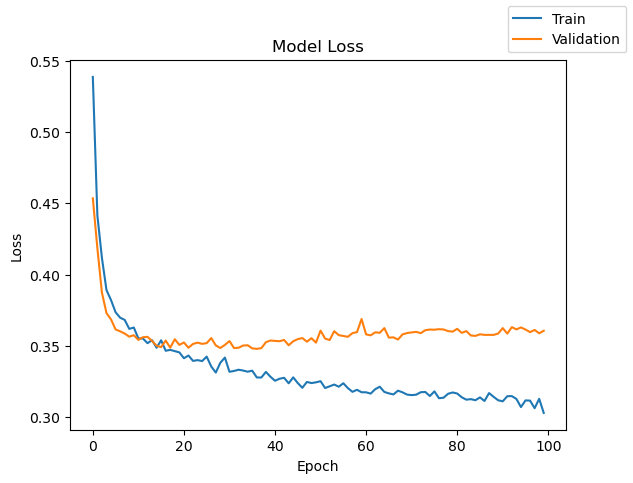

In [73]:
#Plotting Train Loss vs Validation Loss
plot(history_2,'loss')

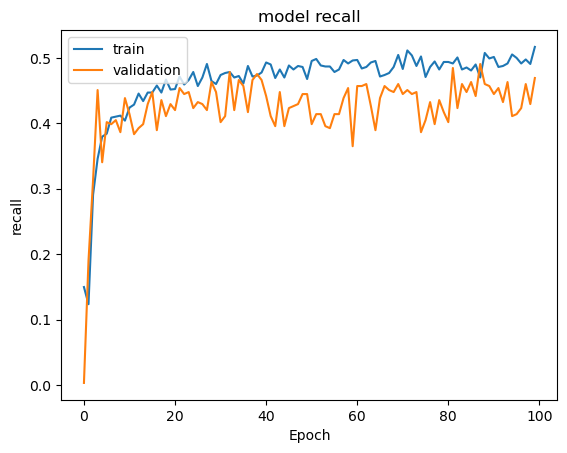

In [74]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [75]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

200/200 [==============================] - 0s 237us/step


In [76]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 235us/step


In [77]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [78]:
train_metric_df

,recall
NN with SGD,0.207055
NN with Adam,0.577454
NN with Adam & Dropout,0.575920


In [79]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      5096
         1.0       0.80      0.58      0.67      1304

    accuracy                           0.88      6400
   macro avg       0.85      0.77      0.80      6400
weighted avg       0.88      0.88      0.88      6400



In [80]:
#classification report
cr = classification_report(y_val,y_val_pred) 
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1274
         1.0       0.68      0.47      0.56       326

    accuracy                           0.85      1600
   macro avg       0.78      0.71      0.73      1600
weighted avg       0.84      0.85      0.84      1600



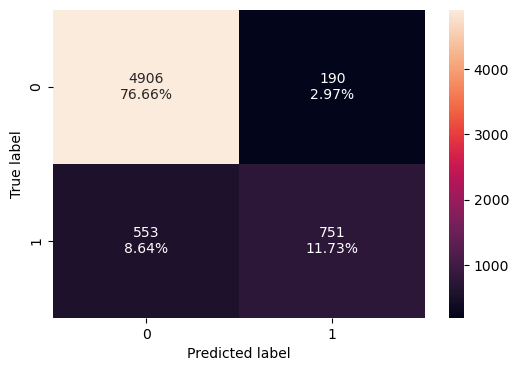

In [81]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

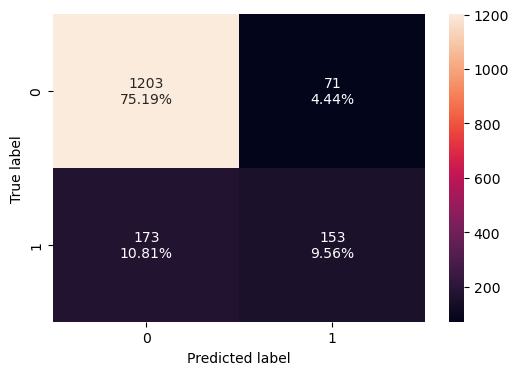

In [82]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [83]:
sm  = SMOTE(random_state=42)

#fit SMOTE on training data
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [84]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [85]:
#Initializing the model
model_3 = Sequential()

model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [86]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.legacy.SGD(0.001)

metric = keras.metrics.Recall()

In [87]:
#compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [88]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [89]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, 
    epochs=epochs, 
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 [==============================] - 0s 419us/step - loss: 0.6957 - recall: 0.7951 - val_loss: 0.7113 - val_recall: 0.7730
Epoch 2/100
319/319 [==============================] - 0s 276us/step - loss: 0.6929 - recall: 0.8201 - val_loss: 0.7079 - val_recall: 0.7761
Epoch 3/100
319/319 [==============================] - 0s 268us/step - loss: 0.6902 - recall: 0.8295 - val_loss: 0.7042 - val_recall: 0.7791
Epoch 4/100
319/319 [==============================] - 0s 273us/step - loss: 0.6876 - recall: 0.8265 - val_loss: 0.7007 - val_recall: 0.7914
Epoch 5/100
319/319 [==============================] - 0s 272us/step - loss: 0.6850 - recall: 0.8201 - val_loss: 0.6971 - val_recall: 0.7853
Epoch 6/100
319/319 [==============================] - 0s 271us/step - loss: 0.6824 - recall: 0.8124 - val_loss: 0.6932 - val_recall: 0.7791
Epoch 7/100
319/319 [==============================] - 0s 272us/step - loss: 0.6796 - recall: 0.8016 - val_loss: 0.6895 - val_recall: 0.7730
Epoch 8/100
3

Epoch 59/100
319/319 [==============================] - 0s 293us/step - loss: 0.5522 - recall: 0.7535 - val_loss: 0.5661 - val_recall: 0.7209
Epoch 60/100
319/319 [==============================] - 0s 298us/step - loss: 0.5508 - recall: 0.7565 - val_loss: 0.5645 - val_recall: 0.7239
Epoch 61/100
319/319 [==============================] - 0s 281us/step - loss: 0.5493 - recall: 0.7555 - val_loss: 0.5633 - val_recall: 0.7178
Epoch 62/100
319/319 [==============================] - 0s 288us/step - loss: 0.5479 - recall: 0.7602 - val_loss: 0.5616 - val_recall: 0.7117
Epoch 63/100
319/319 [==============================] - 0s 303us/step - loss: 0.5464 - recall: 0.7592 - val_loss: 0.5603 - val_recall: 0.7117
Epoch 64/100
319/319 [==============================] - 0s 311us/step - loss: 0.5449 - recall: 0.7598 - val_loss: 0.5589 - val_recall: 0.7086
Epoch 65/100
319/319 [==============================] - 0s 309us/step - loss: 0.5434 - recall: 0.7592 - val_loss: 0.5580 - val_recall: 0.7117
Epoch 

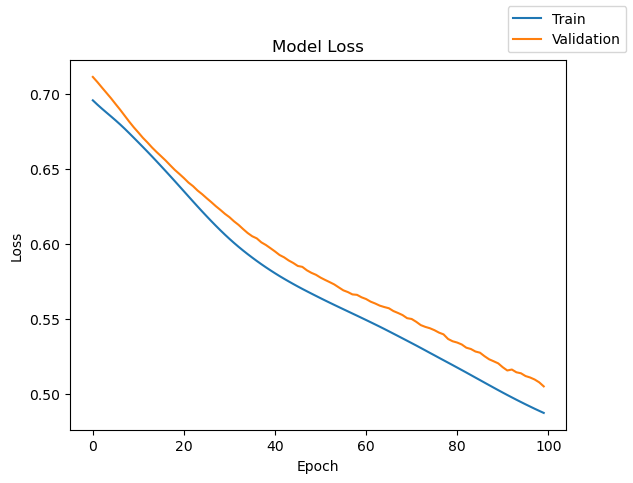

In [90]:
#Plotting Train Loss vs Validation Loss
plot(history_3,'loss')

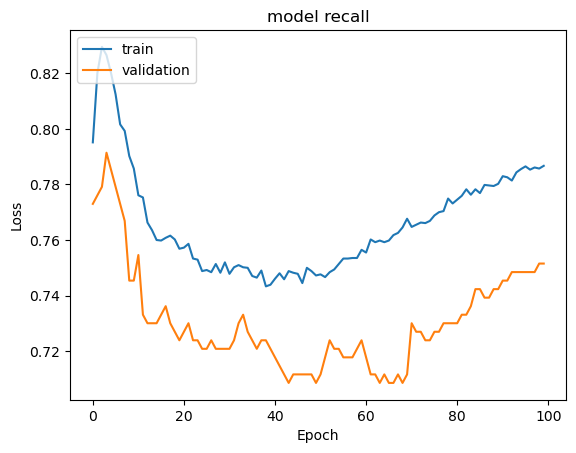

In [92]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [93]:
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

319/319 [==============================] - 0s 189us/step


In [94]:
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 260us/step


In [95]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [96]:
train_metric_df

,recall
NN with SGD,0.207055
NN with Adam,0.577454
NN with Adam & Dropout,0.575920
NN with SMOTE & SGD,0.783752


In [97]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      5096
         1.0       0.76      0.78      0.77      5096

    accuracy                           0.77     10192
   macro avg       0.77      0.77      0.77     10192
weighted avg       0.77      0.77      0.77     10192



In [98]:
cr=classification_report(y_val,y_val_pred) 
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1274
         1.0       0.42      0.75      0.54       326

    accuracy                           0.74      1600
   macro avg       0.67      0.74      0.68      1600
weighted avg       0.82      0.74      0.76      1600



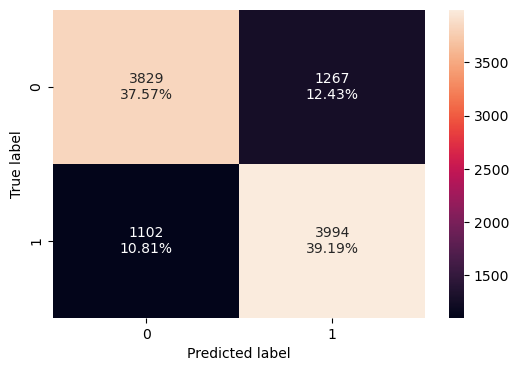

In [99]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

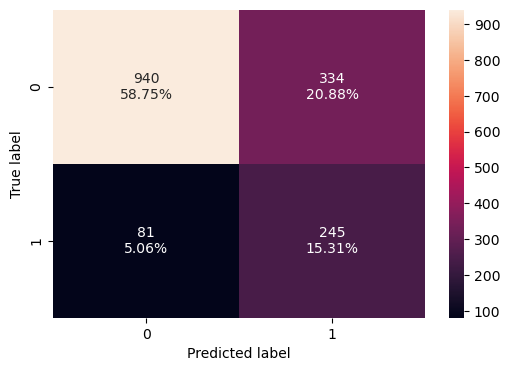

In [100]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) 

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [101]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [102]:
#Initializing the model
model_4 = Sequential()

model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(16,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(1, activation = 'sigmoid'))

In [103]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.legacy.Adam()

In [104]:
#compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [105]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [106]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,  
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
160/160 [==============================] - 0s 692us/step - loss: 0.6255 - recall: 0.7979 - val_loss: 0.5876 - val_recall: 0.7086
Epoch 2/100
160/160 [==============================] - 0s 418us/step - loss: 0.5207 - recall: 0.7802 - val_loss: 0.5181 - val_recall: 0.7699
Epoch 3/100
160/160 [==============================] - 0s 430us/step - loss: 0.4722 - recall: 0.7904 - val_loss: 0.4660 - val_recall: 0.7485
Epoch 4/100
160/160 [==============================] - 0s 431us/step - loss: 0.4522 - recall: 0.7965 - val_loss: 0.4764 - val_recall: 0.7669
Epoch 5/100
160/160 [==============================] - 0s 417us/step - loss: 0.4402 - recall: 0.7908 - val_loss: 0.4615 - val_recall: 0.7454
Epoch 6/100
160/160 [==============================] - 0s 423us/step - loss: 0.4326 - recall: 0.7924 - val_loss: 0.4541 - val_recall: 0.7147
Epoch 7/100
160/160 [==============================] - 0s 406us/step - loss: 0.4274 - recall: 0.7995 - val_loss: 0.4312 - val_recall: 0.6963
Epoch 8/100
1

Epoch 59/100
160/160 [==============================] - 0s 441us/step - loss: 0.3293 - recall: 0.8597 - val_loss: 0.4650 - val_recall: 0.6319
Epoch 60/100
160/160 [==============================] - 0s 395us/step - loss: 0.3261 - recall: 0.8670 - val_loss: 0.4794 - val_recall: 0.6472
Epoch 61/100
160/160 [==============================] - 0s 394us/step - loss: 0.3251 - recall: 0.8673 - val_loss: 0.4641 - val_recall: 0.6135
Epoch 62/100
160/160 [==============================] - 0s 401us/step - loss: 0.3253 - recall: 0.8644 - val_loss: 0.4850 - val_recall: 0.6380
Epoch 63/100
160/160 [==============================] - 0s 399us/step - loss: 0.3232 - recall: 0.8723 - val_loss: 0.4592 - val_recall: 0.5736
Epoch 64/100
160/160 [==============================] - 0s 401us/step - loss: 0.3221 - recall: 0.8689 - val_loss: 0.4716 - val_recall: 0.6411
Epoch 65/100
160/160 [==============================] - 0s 395us/step - loss: 0.3207 - recall: 0.8701 - val_loss: 0.4747 - val_recall: 0.6258
Epoch 

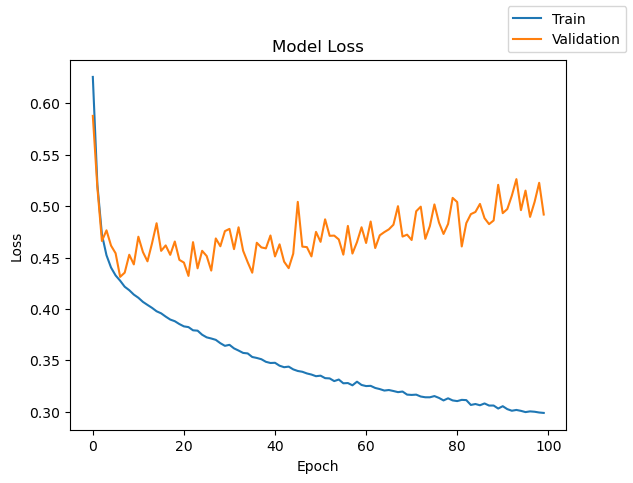

In [107]:
#Plotting Train Loss vs Validation Loss
plot(history_4,'loss')

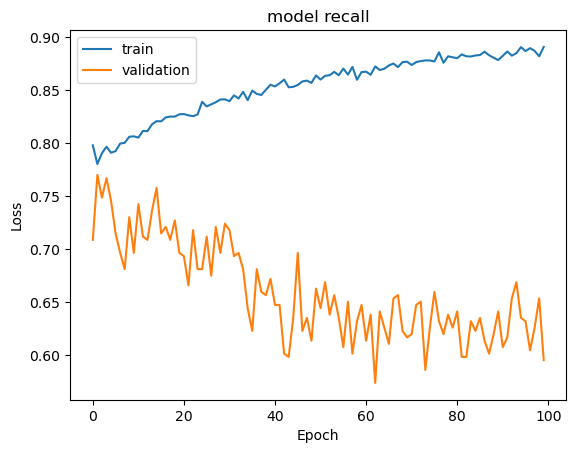

In [108]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [109]:
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

319/319 [==============================] - 0s 190us/step


In [110]:
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 278us/step


In [111]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [112]:
train_metric_df

,recall
NN with SGD,0.207055
NN with Adam,0.577454
NN with Adam & Dropout,0.575920
NN with SMOTE & SGD,0.783752
NN with SMOTE & Adam,0.876570


In [113]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      5096
         1.0       0.88      0.88      0.88      5096

    accuracy                           0.88     10192
   macro avg       0.88      0.88      0.88     10192
weighted avg       0.88      0.88      0.88     10192



In [114]:
cr=classification_report(y_val,y_val_pred) 
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      1274
         1.0       0.48      0.60      0.53       326

    accuracy                           0.79      1600
   macro avg       0.69      0.72      0.70      1600
weighted avg       0.81      0.79      0.80      1600



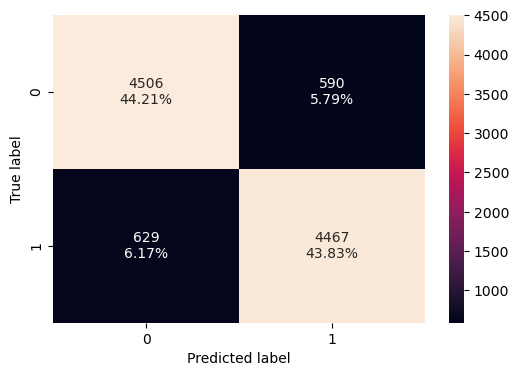

In [115]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

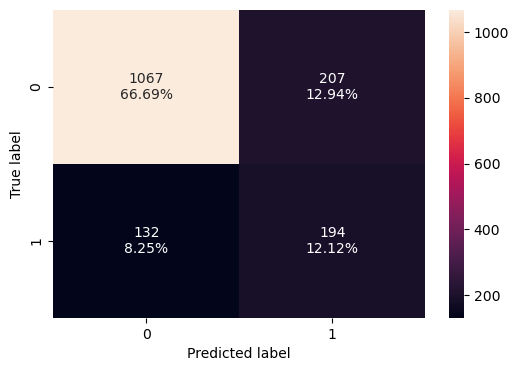

In [116]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [117]:
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [118]:
#Initializing the model
model_5 = Sequential()

model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(0.2))
model_5.add(Dense(16,activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(8,activation='relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

In [119]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.legacy.Adam()

In [120]:
#compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [121]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [122]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/100
160/160 [==============================] - 0s 711us/step - loss: 0.6457 - recall: 0.7331 - val_loss: 0.5984 - val_recall: 0.7454
Epoch 2/100
160/160 [==============================] - 0s 446us/step - loss: 0.5643 - recall: 0.7496 - val_loss: 0.5349 - val_recall: 0.7362
Epoch 3/100
160/160 [==============================] - 0s 444us/step - loss: 0.5291 - recall: 0.7688 - val_loss: 0.4820 - val_recall: 0.7178
Epoch 4/100
160/160 [==============================] - 0s 436us/step - loss: 0.5101 - recall: 0.7667 - val_loss: 0.4987 - val_recall: 0.7791
Epoch 5/100
160/160 [==============================] - 0s 442us/step - loss: 0.4995 - recall: 0.7555 - val_loss: 0.4666 - val_recall: 0.7485
Epoch 6/100
160/160 [==============================] - 0s 438us/step - loss: 0.4877 - recall: 0.7637 - val_loss: 0.4661 - val_recall: 0.7331
Epoch 7/100
160/160 [==============================] - 0s 426us/step - loss: 0.4801 - recall: 0.7653 - val_loss: 0.4515 - val_recall: 0.7209
Epoch 8/100
1

Epoch 59/100
160/160 [==============================] - 0s 429us/step - loss: 0.4180 - recall: 0.8097 - val_loss: 0.4540 - val_recall: 0.7454
Epoch 60/100
160/160 [==============================] - 0s 446us/step - loss: 0.4216 - recall: 0.8102 - val_loss: 0.4470 - val_recall: 0.7086
Epoch 61/100
160/160 [==============================] - 0s 432us/step - loss: 0.4207 - recall: 0.8100 - val_loss: 0.4531 - val_recall: 0.7331
Epoch 62/100
160/160 [==============================] - 0s 421us/step - loss: 0.4167 - recall: 0.8142 - val_loss: 0.4364 - val_recall: 0.7055
Epoch 63/100
160/160 [==============================] - 0s 445us/step - loss: 0.4199 - recall: 0.8110 - val_loss: 0.4396 - val_recall: 0.7209
Epoch 64/100
160/160 [==============================] - 0s 448us/step - loss: 0.4221 - recall: 0.8136 - val_loss: 0.4352 - val_recall: 0.6963
Epoch 65/100
160/160 [==============================] - 0s 437us/step - loss: 0.4179 - recall: 0.8130 - val_loss: 0.4513 - val_recall: 0.7301
Epoch 

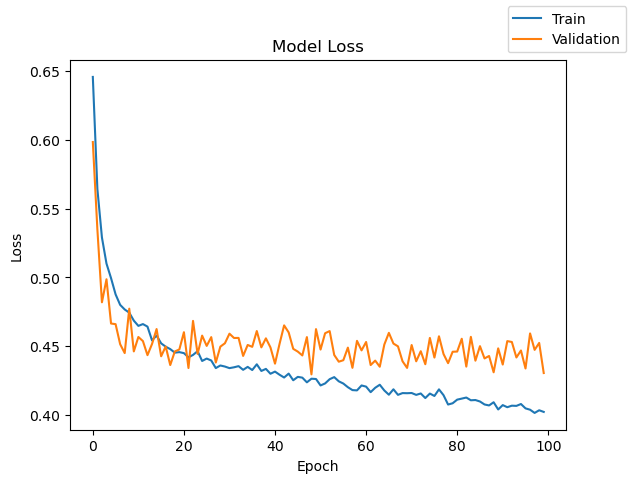

In [123]:
#Plotting Train Loss vs Validation Loss
plot(history_5,'loss')

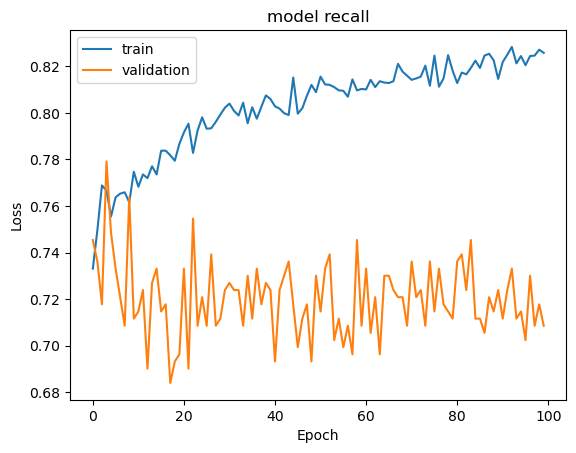

In [124]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [125]:
y_train_pred = model_5.predict(X_train_smote)

#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)

319/319 [==============================] - 0s 197us/step


In [126]:
y_val_pred = model_5.predict(X_val)

#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 275us/step


In [127]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [128]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      5096
         1.0       0.85      0.83      0.84      5096

    accuracy                           0.84     10192
   macro avg       0.84      0.84      0.84     10192
weighted avg       0.84      0.84      0.84     10192



In [129]:
#classification report
cr=classification_report(y_val,y_val_pred)  
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      1274
         1.0       0.51      0.71      0.59       326

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.83      0.80      0.81      1600



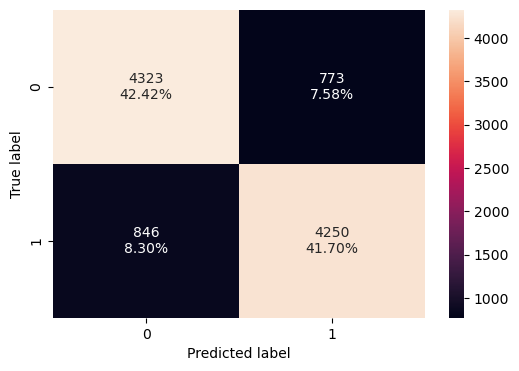

In [130]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

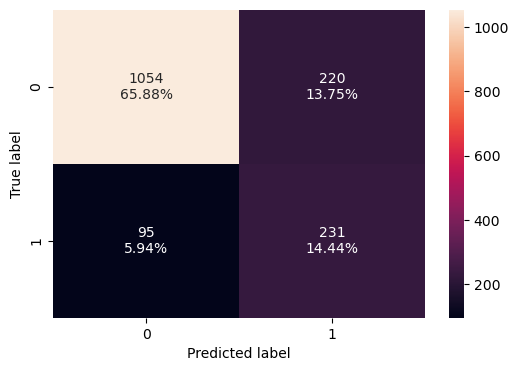

In [131]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  

## Model Performance Comparison and Final Model Selection

In [132]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.207055
NN with Adam,0.577454
NN with Adam & Dropout,0.575920
NN with SMOTE & SGD,0.783752
NN with SMOTE & Adam,0.876570
"NN with SMOTE,Adam & Dropout",0.833987


In [133]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.190184
NN with Adam,0.487730
NN with Adam & Dropout,0.469325
NN with SMOTE & SGD,0.751534
NN with SMOTE & Adam,0.595092
"NN with SMOTE,Adam & Dropout",0.708589


In [134]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.016871
NN with Adam,0.089724
NN with Adam & Dropout,0.106595
NN with SMOTE & SGD,0.032218
NN with SMOTE & Adam,0.281478
"NN with SMOTE,Adam & Dropout",0.125398


In [135]:
y_test_pred = model_3.predict(X_test)    
y_test_pred = (y_test_pred > 0.5)

63/63 [==============================] - 0s 267us/step


In [136]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1593
         1.0       0.42      0.75      0.54       407

    accuracy                           0.74      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.74      0.76      2000



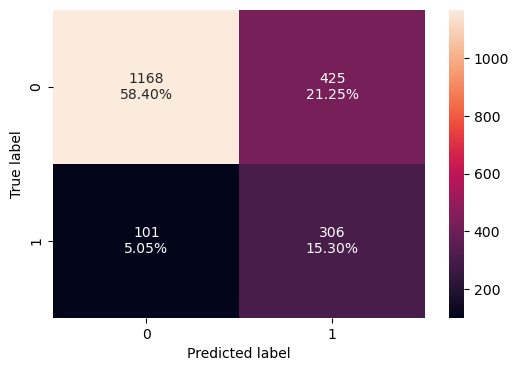

In [137]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

**Performance Overview**: Handling class imbalance is critical. Models using SMOTE (Synthetic Minority Over-sampling Technique) showed significantly improved recall compared to models without it. Addressing class imbalance in the data via SMOTE played a key role in improving model performance.

**Training vs. Validation Gap**: There are noticeable differences between training and validation recall scores; Among the better performing models, NN model with SMOTE & SGD has the lowest range between the training and validation metric results, indicating reasonable generalization.

**Focus Retention Efforts on Predicted Churners**: Use the best-performing model (e.g., SMOTE + SGD with ~ 0.75 recall on the validation set) to identify high-risk customers and design targeted retention campaigns.
    
**Improve the model’s utility in identifying churners**: While the current results are promising, aim for recall values above 0.80 on the validation set to minimize false negatives further.

<font size=6 color='blue'>Power Ahead</font>
___